<a href="https://colab.research.google.com/github/zahrahkkn-lab/operational_urban_developpement/blob/main/USMB_solar_project_panel_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. open https://roboflow.com
2. sign in
3. creat a new project
4. fill project name and annotation gp
5. project type : instance segmentation and create a public project
6. upload as many as images including solar panels then save and continue
7. go to annotate, in unassigned select annotate images
8. select label myself and specify panels area with polygone tool
9. press train button (ex one , move this image to valid, and one , move this image to test.)
10. add images to dataset.
11. go to version and add augmentation process
12. choose some augmentation uption (ex: flip, rotation, noise, saturaion) then continue
13. after creating, download dataset
14. immage and annotation format is : YOLOv11 and choose , show download code, and continue.
15. coppy yhe snipped and pase it in to your main code.


In [ ]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 107.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 70.2 MB/s eta 0:00:00


In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import files
files.upload()   # choose the .zip

Saving USBM.v2-test.yolov11.zip to USBM.v2-test.yolov11.zip


{'USBM.v2-test.yolov11.zip': b'PK\x03\x04\x14\x03\x00\x00\x08\x00\xd1R3\\\xea_\xc6\xe7e\x00\x00\x00i\x00\x00\x00\x12\x00\x00\x00README.dataset.txt-\xca\xa1\x0e\x830\x10\x06`\x7fO\xf1\'\xf3\xed\xc4\x14b\x02\xec\x96,\x03\x04\x92\xc2\x11\x9a\x00Gzm\to\x8f\xe1\xd3\xdf\x03m]~\xf1F\xc3\x1ai\x8eq\xd7\xc2\xda\xb4\xf9\xccA\xd9\x04q2-r\x98AV\xab}\x16\xcf6\xa9[\x89~A\xb2\x1fy\x84;\xd1\xe3\x7f?$\xe5@\x1f?\xf0\xa6\\\xa0\xaaPvx\x99\'\xd1\x05PK\x03\x04\x14\x03\x00\x00\x08\x00\xd1R3\\Rc\xdcv\x80\x02\x00\x00\xe5\x04\x00\x00\x13\x00\x00\x00README.roboflow.txt}S]o\xd3@\x10|\xf7\xaf\xd8\x17P[\xf2\xe5@+Q\x89\x87\x82(\x02QUj\n\x82\'t\xb67\xf1\xb5\xe7\xbb\xd3\xdd:i\xfa\xeb\x99s\x9c\xa4\x1fPK\x96\xed\xbd\xdd\xd9\xd9\xd9q\xf6c\xf6\xf1\x82\x86\xb4\x9c\xd25G\xc9>\xbcxe\xd9u\xad#UJTd\xa1\x95\x8a\xc4w\xde\x05\xe1\x8a\x96ZQp\x85\x9b\x1b\xb7\x1a\x95\xae!g\xe9\x9b\xb2\xad\nk\xca\xdf\x0fh:\x99\x9e\x90\x12\xca\'\xa7\xd3)\x9d]\xd0\x97\x8b\xeb,\xbb\xea+\x08\xb0\xca\x12\xdbj(n\x88\x07\x01\xc2\xb7\xc2\x01\xc0Q\x03\xcb\x1b%

In [ ]:
import zipfile, os

zip_path = "/content/USBM.v2-test.yolov11.zip"   # change this
out_dir = "/content/roboflow_dataset"

os.makedirs(out_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(out_dir)

print("Extracted to:", out_dir)

Extracted to: /content/roboflow_dataset


Num train images: 21


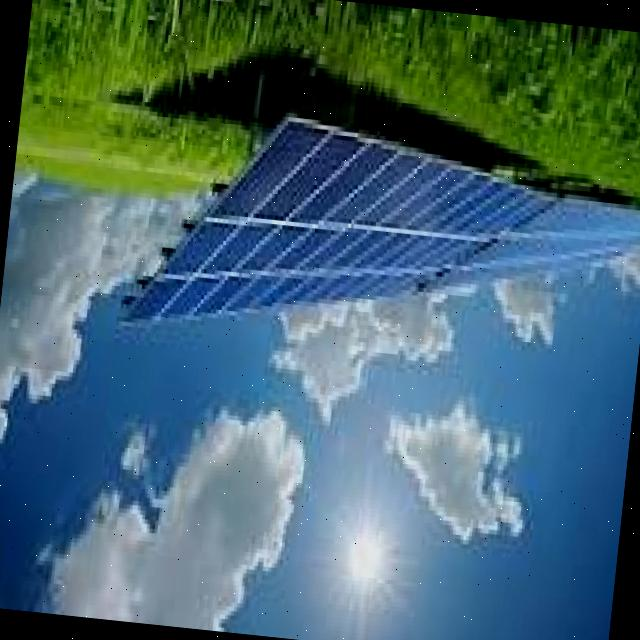

In [ ]:
from pathlib import Path
from PIL import Image

root = Path(out_dir)
img_paths = sorted((root / "train" / "images").glob("*.*"))
print("Num train images:", len(img_paths))

Image.open(img_paths[0])

In [ ]:
import os
for r, d, f in os.walk("/content/roboflow_dataset"):
    if r.endswith("images"):
        print(r, "->", len(f), "files")

/content/roboflow_dataset/train/images -> 21 files


In [ ]:
rf = Roboflow(api_key="1UEzOWbI3C0N1Tq8xPOe")
project = rf.workspace("savoie").project("usmb")

print(f"Available versions for project '{project.name}':")
for v in project.versions():
    print(f"- Version {v.version}: {v.name}")

# IMPORTANT: After seeing the available versions, please replace <YOUR_VALID_VERSION_NUMBER_OR_NAME_HERE> with a valid one.
# For example: version = project.version(1) or version = project.version('my_dataset_v1')
# Then uncomment the following two lines:
# version = project.version(<YOUR_VALID_VERSION_NUMBER_OR_NAME_HERE>)
# dataset = version.download("yolov11")

NameError: name 'Roboflow' is not defined

In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11l-seg summary (fused): 203 layers, 27,646,272 parameters, 0 gradients, 132.2 GFLOPs


FileNotFoundError: '/ultralytics/ultralytics/cfg/datasets/coco.yaml' does not exist

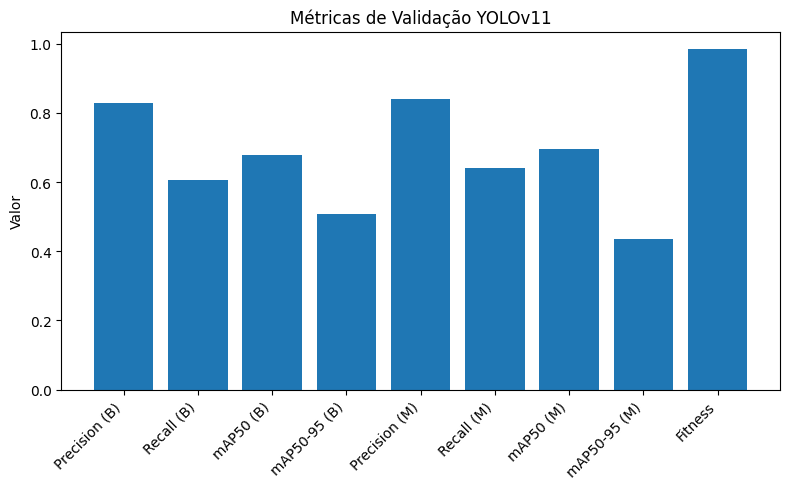

In [ ]:
import matplotlib.pyplot as plt

# Renomear as chaves para algo mais curto
labels_map = {
    "metrics/precision(B)": "Precision (B)",
    "metrics/recall(B)": "Recall (B)",
    "metrics/mAP50(B)": "mAP50 (B)",
    "metrics/mAP50-95(B)": "mAP50-95 (B)",
    "metrics/precision(M)": "Precision (M)",
    "metrics/recall(M)": "Recall (M)",
    "metrics/mAP50(M)": "mAP50 (M)",
    "metrics/mAP50-95(M)": "mAP50-95 (M)",
    "fitness": "Fitness"
}

# Usar labels simplificados
keys = list(metrics_dict.keys())
values = list(metrics_dict.values())
labels = [labels_map.get(k, k) for k in keys]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Valor")
plt.title("Métricas de Validação YOLOv11")
plt.tight_layout()
plt.show()

In [ ]:
results = model.predict("images.jpg", save=True)

# Mostrar máscaras detectadas
results[0].plot()

In [ ]:

!pip install ultralytics

from ultralytics import YOLO



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="buMGF1FhJBQTVvngwajD")
project = rf.workspace("myprojects-20ycu").project("usmb-3ou0v")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to USMB-1 in yolov11:: 100%|██████████| 52/52 [00:00<00:00, 6437.54it/s]


In [ ]:
import os
from ultralytics import YOLO # Ensure YOLO is imported

# carregar modelo
#model = YOLO("yolo11l-seg.pt") # Initialize the model
model =YOLO("yolo11s-seg.pt")
# treinar
model.train(
    data=os.path.join(dataset.location, "data.yaml"),
    epochs=2,         # mais épocas para convergência melhor
    imgsz=416,         # imagens maiores para detalhes
    batch=4,           # aproveitando os 16GB da GPU
    workers=8,          # pode aumentar se sua máquina tiver muitos núcleos
    project="usmb-3ou0v",
    name="exp_highres"
)

Ultralytics 8.4.6 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/USMB-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp_highres, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f42ea0e6780>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 